In [27]:
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()

In [28]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [29]:
# dataset info

bc.target.shape

(569,)

In [30]:
bc.data.shape

(569, 30)

In [31]:
# Preprocessing

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.2)

In [32]:
print(f"Feature ==> train: {x_train.shape} - test: {x_test.shape}")
print(f"Lable ==> train: {y_train.shape} - test: {y_test.shape}")

Feature ==> train: (455, 30) - test: (114, 30)
Lable ==> train: (455,) - test: (114,)


In [33]:
# Normalize

from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler(feature_range=(0, 1))

x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

## Classification



In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def calculate_metric(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_true=y_train , y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test , y_pred=y_pred_test)
    
    p = precision_score(y_true=y_test , y_pred=y_pred_test)
    r = recall_score(y_true=y_test , y_pred=y_pred_test)
    
    print(f"acc train: {acc_train} - acc_test: {acc_test} - precision: {p} - recall: {r}")
    
    return acc_train, acc_test, p, r

## 1. Naive bayes 

In [35]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train , y_train)

GaussianNB()

In [36]:
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb = calculate_metric(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9406593406593406 - acc_test: 0.956140350877193 - precision: 0.9452054794520548 - recall: 0.9857142857142858


## 2. KNN

In [37]:
from sklearn. neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', leaf_size=28)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [38]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metric(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9736263736263736 - acc_test: 0.9736842105263158 - precision: 0.958904109589041 - recall: 1.0


## 3. Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=64, min_samples_split=4, criterion='entropy')
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=64, min_samples_split=4)

In [40]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

acc_train_dt, acc_test_dt, p_dt, r_dt = calculate_metric(y_train, y_test, y_pred_train, y_pred_test)

acc train: 1.0 - acc_test: 0.9210526315789473 - precision: 0.9420289855072463 - recall: 0.9285714285714286


## 4. Random Forest

In [41]:
from sklearn. ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, max_depth=32, min_samples_split=4)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=32, min_samples_split=4, n_estimators=1000)

In [42]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metric(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9956043956043956 - acc_test: 0.9649122807017544 - precision: 0.9714285714285714 - recall: 0.9714285714285714


## 5. SVM 

In [43]:
from sklearn.svm import SVC

svm = SVC(kernel='poly')
svm.fit(x_train, y_train)

SVC(kernel='poly')

In [44]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metric(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9868131868131869 - acc_test: 0.9649122807017544 - precision: 0.9583333333333334 - recall: 0.9857142857142858


## 6. Logistic regression

In [45]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [46]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

acc_train_lr, acc_test_lr, p_lr, r_lr = calculate_metric(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9692307692307692 - acc_test: 0.9649122807017544 - precision: 0.9459459459459459 - recall: 1.0


## 7. ANN

In [47]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=1024, activation='tanh', solver='lbfgs', batch_size=64)
ann.fit(x_train, y_train)

MLPClassifier(activation='tanh', batch_size=64, hidden_layer_sizes=1024,
              solver='lbfgs')

In [48]:
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metric(y_train, y_test, y_pred_train, y_pred_test)

acc train: 1.0 - acc_test: 0.9649122807017544 - precision: 0.9583333333333334 - recall: 0.9857142857142858


## Comparison

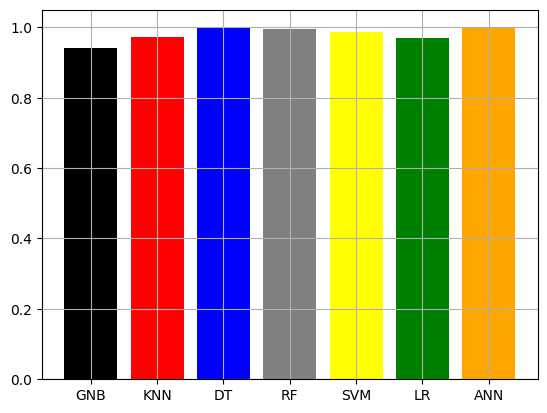

In [49]:
import matplotlib.pyplot as plt

acc_train = [acc_train_gnb, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm, acc_train_lr, acc_train_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ["black","red","blue","gray","yellow","green","orange"]

plt.bar(title, acc_train, color=colors)
plt.grid()
plt.show()

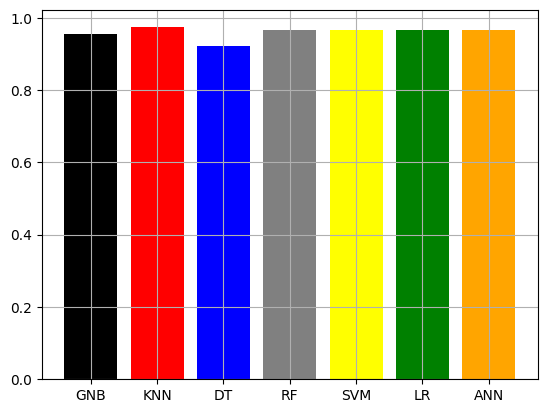

In [50]:
acc_test = [acc_test_gnb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_lr, acc_test_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ["black","red","blue","gray","yellow","green","orange"]

plt.bar(title, acc_test, color=colors)
plt.grid()
plt.show()

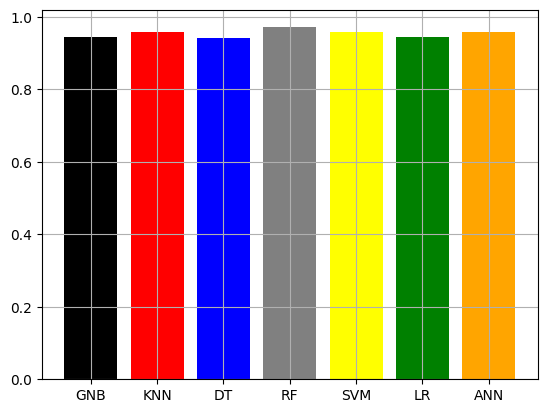

In [51]:
p = [p_gnb, p_knn, p_dt, p_rf, p_svm, p_lr, p_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ["black","red","blue","gray","yellow","green","orange"]

plt.bar(title, p, color=colors)
plt.grid()
plt.show()

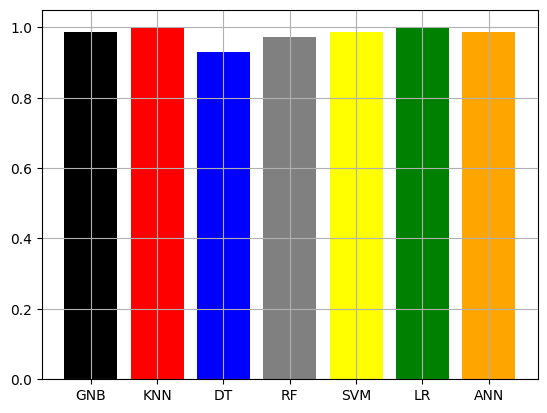

In [52]:
r = [r_gnb, r_knn, r_dt, r_rf, r_svm, r_lr, r_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ["black","red","blue","gray","yellow","green","orange"]

plt.bar(title, r, color=colors)
plt.grid()
plt.show()